Lab3: Wide data and linear models
You are provided with a dataset for 554 patients, 80% (444 patients) of the dataset was selected to be the training set, and 20% (110 patients) as the test set. Features and labels of the training set can be found in train_X.csv, train_y.csv respectively. Features of the test set can be found in test_X.csv while labels are hidden.

Your task is to predict the disease type (phenotype) from transcriptomics data. Disease: UCEC (uterine corpus endometrial carcinoma). Labels (1/0) are encoding tumor grade “II-” vs. “III+”

Specific tasks:
Please use binary classification (0/1) using linear models. Measure the classification performance using accuracy and F1-score on the given validation set. Please report averaged values.
Develop a pipeline to try different linear models (linear regression, logistic regression, Ridge regression, LASSO, etc.)
Study the effect of regularization parameters on model performance. What model is the best?
Compare your best model accuracy with random guessing (Hint: scramble labels aka Y-randomization)
What are the top important genes for the model decision?
Try to visualize the dataset and see if you could visually separate two groups of patients
Bonus Qs:
You could use https://www.uniprot.org/Links to an external site, and search for Gene IDs. See if there is a meaningful connection between the top 10 most important genes and disease. Did your model recapitulate of the known association between Genes and Disease?

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [218]:
 # Loading the csv files
X_train = pd.read_csv(r"C:\Users\kantg\OneDrive\Desktop\CMU\ML for Science\HW 3\train_X.csv")
y_train = pd.read_csv(r"C:\Users\kantg\OneDrive\Desktop\CMU\ML for Science\HW 3\train_y.csv")
X_test = pd.read_csv(r"C:\Users\kantg\OneDrive\Desktop\CMU\ML for Science\HW 3\test_X.csv")

In [219]:
# Checking for nulls. No nulls in the training and test data set
print("Nulls in X_train is ", X_train.isna().sum().sum())
print("Nulls in y_train is ", y_train.isna().sum().sum())
print("Nulls in X_test is ", X_test.isna().sum().sum())

#Checking for non-integer columns. Looks like only the identifier column has object data type
print("Non-numeric columns in X_train are", X_train.select_dtypes(include=['object']).columns.tolist())
print("Non-numeric columns in y_train are", y_train.select_dtypes(include=['object']).columns.tolist())
print("Non-numeric columns in X_test are", X_test.select_dtypes(include=['object']).columns.tolist())

Nulls in X_train is  0
Nulls in y_train is  0
Nulls in X_test is  0
Non-numeric columns in X_train are ['Unnamed: 0']
Non-numeric columns in y_train are ['Unnamed: 0']
Non-numeric columns in X_test are ['Unnamed: 0']


In [220]:
#Exploring the y_train data
y_train.info()
# Classes are not imbalanced. Overall % - 0 (43%) and 1 (57%) ----- INCLUDE CODE FOR THIS!!!
print(y_train.groupby(['xml_neoplasm_histologic_grade']).count())

#Scaling the training and test data set
X_train_1 = X_train.iloc[:,1:]
scaler = preprocessing.StandardScaler().fit(X_train_1)
X_train_1 = pd.DataFrame(scaler.transform(X_train_1),columns= X_train_1.columns, index = X_train_1.index) 

X_test_1 = X_test.iloc[:,1:]
scaler = preprocessing.StandardScaler().fit(X_test_1)
X_test_1 = pd.DataFrame(scaler.transform(X_test_1),columns= X_test_1.columns, index = X_test_1.index) 


y_train_1 = y_train.iloc[:,1]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     444 non-null    object
 1   xml_neoplasm_histologic_grade  444 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.1+ KB
                               Unnamed: 0
xml_neoplasm_histologic_grade            
0                                     190
1                                     254


In [221]:
# Logistic regression

log_reg = LogisticRegression(random_state=6,max_iter=200)
log_reg.fit(X_train_1, y_train_1)

#Predicting the test set results
y_test = log_reg.predict(X_test_1)

# Output to a csv file
X_test_with_prediction = X_test
X_test_with_prediction['xml_neoplasm_histologic_grade'] = y_test
X_test_with_prediction_output =  X_test_with_prediction.iloc[:, [0, -1]]
X_test_with_prediction_output = X_test_with_prediction_output.rename(columns={'Unnamed: 0' : 'ID'})
X_test_with_prediction_output.to_csv(r'C:\Users\kantg\OneDrive\Desktop\CMU\ML for Science\HW 3\Output\X_test_with_prediction_output.csv',index=None, header=True)


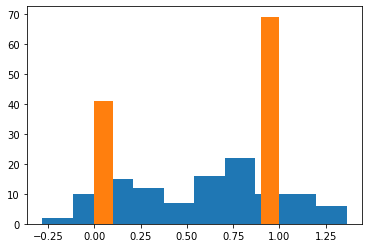

In [225]:
# Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train_1, y_train_1)

#Predicting the test set results
y_test = lin_reg.predict(X_test_1)
plot_1 = plt.hist(y_test, bins = 10)
# Setting the threshold to decide 0/1 classifier
y_test = np.where(y_test < 0.5, 0 , 1) #86.56
#y_test = np.where(y_test < 0.6, 0 , 1) #85.24
#y_test = np.where(y_test < 0.4, 0 , 1) #86.56

plot_2 = plt.hist(y_test)


#Output to a csv file
X_test_with_prediction = X_test
X_test_with_prediction['xml_neoplasm_histologic_grade'] = y_test
X_test_with_prediction_output =  X_test_with_prediction.iloc[:, [0, -1]]
X_test_with_prediction_output = X_test_with_prediction_output.rename(columns={'Unnamed: 0' : 'ID'})
X_test_with_prediction_output.to_csv(r'C:\Users\kantg\OneDrive\Desktop\CMU\ML for Science\HW 3\Output\X_test_with_prediction_output.csv',index=None, header=True)



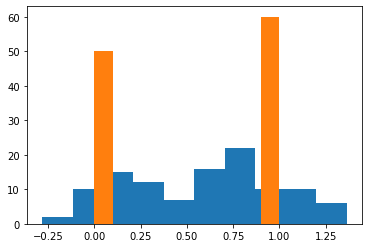

In [258]:
# Ridge Regression

rid_reg = Ridge(alpha = 0.75)
rid_reg.fit(X_train_1, y_train_1)

#Predicting the test set results
y_test = lin_reg.predict(X_test_1)
plot_1 = plt.hist(y_test, bins = 10)


# Setting the threshold to decide 0/1 classifier
y_test = np.where(y_test < 0.6, 0 ,1) #86.56
plot_2 = plt.hist(y_test)

#Output to a csv file
X_test_with_prediction = X_test
X_test_with_prediction['xml_neoplasm_histologic_grade'] = y_test
X_test_with_prediction_output =  X_test_with_prediction.iloc[:, [0, -1]]
X_test_with_prediction_output = X_test_with_prediction_output.rename(columns={'Unnamed: 0' : 'ID'})
X_test_with_prediction_output.to_csv(r'C:\Users\kantg\OneDrive\Desktop\CMU\ML for Science\HW 3\Output\X_test_with_prediction_output.csv',index=None, header=True)


In [272]:
#Select top 1000 features based on SelectKBest mutual info classification (other score functions: chi2 etc.)

X_train_Kbest_1 = SelectKBest(score_func = mutual_info_classif, k=1000)
X_train_Kbest_1.fit(X_train_1, y_train_1)
X_train_Kbest_1_columns = X_train_1.columns[X_train_Kbest_1.get_support()]